In [1]:
import numpy as np 
import pandas as pd 

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('Final_Model_data.csv',header=0,encoding = 'unicode_escape',index_col='rownum')

In [4]:
df.head()

,budget,id,original_title,popularity,revenue,runtime,vote_average,vote_count,weighted_rating,cast_size,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
rownum,,,,,,,,,,,,,,,,,,,,,
1,30000000,862,Toy Story,21.946943,373554033,81,7.7,5415,7.684645,13,...,0,0,0,0,0,0,0,0,0,0
2,65000000,8844,Jumanji,17.015539,262797249,104,6.9,2413,6.876926,26,...,0,0,0,0,0,0,0,0,0,0
3,16000000,31357,Waiting to Exhale,3.859495,81452156,127,6.1,34,5.675590,10,...,0,0,0,0,0,0,0,0,0,0
4,0,11862,Father of the Bride Part II,8.387519,76578911,106,5.7,173,5.624595,12,...,0,0,0,0,0,0,0,0,0,0
5,60000000,949,Heat,17.924927,187436818,170,7.7,1886,7.656437,65,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.dtypes

budget                     int64
id                         int64
original_title            object
popularity               float64
revenue                    int64
runtime                    int64
vote_average             float64
vote_count                 int64
weighted_rating          float64
cast_size                  int64
crew_size                  int64
revenue_divide_budget    float64
movie_count                int64
director_Rank              int64
collection_Rank            int64
prod_Comp_Rank             int64
genres_Rank                int64
Genre_0                    int64
Genre_Action               int64
Genre_Adventure            int64
Genre_Animation            int64
Genre_Comedy               int64
Genre_Crime                int64
Genre_Documentary          int64
Genre_Drama                int64
Genre_Family               int64
Genre_Fantasy              int64
Genre_Foreign              int64
Genre_History              int64
Genre_Horror               int64
Genre_Musi

In [6]:
df.shape

(46623, 38)

In [7]:
#df.loc[df['revenue'] == 0.0]

In [8]:
df[df.revenue == 0.0]

,budget,id,original_title,popularity,revenue,runtime,vote_average,vote_count,weighted_rating,cast_size,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
rownum,,,,,,,,,,,,,,,,,,,,,
6,58000000,11860,Sabrina,6.677277,0,127,6.2,141,6.014294,57,...,0,0,0,0,0,0,0,0,0,0
7,0,45325,Tom and Huck,2.561161,0,97,5.4,45,5.331446,7,...,0,0,0,0,0,0,0,0,0,0
11,0,12110,Dracula: Dead and Loving It,5.430331,0,88,5.7,210,5.635982,11,...,0,0,0,0,0,0,0,0,0,0
21,0,1710,Copycat,10.701801,0,124,6.5,199,6.316734,15,...,0,0,0,0,0,0,0,0,0,0
23,0,12665,Powder,12.133094,0,111,6.3,143,6.097279,5,...,0,0,0,0,0,0,0,0,0,0
25,0,16420,Othello,1.845899,0,123,7.0,33,6.119348,9,...,0,0,0,0,0,0,0,0,0,0
27,0,17015,Persuasion,2.228434,0,104,7.4,36,6.365010,26,...,0,0,0,0,0,0,0,0,0,0
29,0,37557,¾Ôà¥_¾Ôà_Î¾Ôàö¡_Ð© ¾Á´,1.100915,0,108,6.5,17,5.675302,6,...,0,0,0,0,0,0,0,0,0,0
32,0,78802,"Guillaumet, les ailes du courage",0.745542,0,50,6.8,4,5.438864,7,...,0,0,0,0,1,0,0,0,0,0


In [9]:
df[df.budget == 0.0]

,budget,id,original_title,popularity,revenue,runtime,vote_average,vote_count,weighted_rating,cast_size,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
rownum,,,,,,,,,,,,,,,,,,,,,
4,0,11862,Father of the Bride Part II,8.387519,76578911,106,5.7,173,5.624595,12,...,0,0,0,0,0,0,0,0,0,0
7,0,45325,Tom and Huck,2.561161,0,97,5.4,45,5.331446,7,...,0,0,0,0,0,0,0,0,0,0
11,0,12110,Dracula: Dead and Loving It,5.430331,0,88,5.7,210,5.635982,11,...,0,0,0,0,0,0,0,0,0,0
12,0,21032,Balto,12.140733,11348324,78,7.1,423,6.961825,13,...,0,0,0,0,0,0,0,0,0,0
21,0,1710,Copycat,10.701801,0,124,6.5,199,6.316734,15,...,0,0,0,0,0,0,0,0,0,0
23,0,12665,Powder,12.133094,0,111,6.3,143,6.097279,5,...,0,0,0,0,0,0,0,0,0,0
25,0,16420,Othello,1.845899,0,123,7.0,33,6.119348,9,...,0,0,0,0,0,0,0,0,0,0
27,0,17015,Persuasion,2.228434,0,104,7.4,36,6.365010,26,...,0,0,0,0,0,0,0,0,0,0
29,0,37557,¾Ôà¥_¾Ôà_Î¾Ôàö¡_Ð© ¾Á´,1.100915,0,108,6.5,17,5.675302,6,...,0,0,0,0,0,0,0,0,0,0


In [10]:
indexNames = df[ (df['revenue'] == 0.0) | (df['budget'] == 0.0) ].index

In [11]:
#indexNames

In [12]:
df.drop(indexNames , inplace=True)

In [13]:
df.shape

(5458, 38)

In [14]:
df.head()

,budget,id,original_title,popularity,revenue,runtime,vote_average,vote_count,weighted_rating,cast_size,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
rownum,,,,,,,,,,,,,,,,,,,,,
1,30000000,862,Toy Story,21.946943,373554033,81,7.7,5415,7.684645,13,...,0,0,0,0,0,0,0,0,0,0
2,65000000,8844,Jumanji,17.015539,262797249,104,6.9,2413,6.876926,26,...,0,0,0,0,0,0,0,0,0,0
3,16000000,31357,Waiting to Exhale,3.859495,81452156,127,6.1,34,5.675590,10,...,0,0,0,0,0,0,0,0,0,0
5,60000000,949,Heat,17.924927,187436818,170,7.7,1886,7.656437,65,...,0,0,0,0,0,0,0,0,0,0
8,35000000,9091,Sudden Death,5.231580,64350171,106,5.5,174,5.457491,6,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df = df.drop(['id', 'original_title'], axis=1)

In [16]:
df.shape

(5458, 36)

In [17]:
import statsmodels.api as sm

X = df["budget"]
y = df["revenue"]

/Users/APM/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [18]:



# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       8.862
Model:                            OLS   Adj. R-squared:                  8.864
Method:                 Least Squares   F-statistic:                    -6151.
Date:                Sun, 28 Apr 2019   Prob (F-statistic):               1.00
Time:                        08:51:21   Log-Likelihood:            -1.0896e+05
No. Observations:                5458   AIC:                         2.179e+05
Df Residuals:                    5457   BIC:                         2.179e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
budget         2.9777      0.030     98.322      0.000       2.918       3.037
==============================================================================
Omnibus:                     4775.001   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           375422.317
Skew:                           3.796   Prob(JB):                         0.00
Kurtosis:                      42.915   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
X = df[['budget','weighted_rating']]
y = df['revenue']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       8.858
Model:                            OLS   Adj. R-squared:                  8.861
Method:                 Least Squares   F-statistic:                    -3075.
Date:                Sun, 28 Apr 2019   Prob (F-statistic):               1.00
Time:                        08:51:21   Log-Likelihood:            -1.0896e+05
No. Observations:                5458   AIC:                         2.179e+05
Df Residuals:                    5456   BIC:                         2.179e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
budget              2.9394      0.038     76.440      0.000       2.864       3.015
weighted_rating  5.099e+05   3.16e+05      1.615      0.106   -1.09e+05    1.13e+06
==============================================================================
Omnibus:                     4839.909   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           388905.517
Skew:                           3.876   Prob(JB):                         0.00
Kurtosis:                      43.620   Cond. No.                     1.04e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
from sklearn import linear_model

In [21]:
# Put the target revenue in another DataFrame
target = pd.DataFrame(df.revenue, columns=["revenue"])

In [22]:
target.head()

,revenue
rownum,
1,373554033
2,262797249
3,81452156
5,187436818
8,64350171


In [23]:
df = df.drop(['revenue'], axis=1)

In [24]:
X = df
y = target['revenue']

In [25]:
X.shape

(5458, 35)

In [26]:
y.shape

(5458,)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                  random_state=1)

In [28]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)


/Users/APM/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [29]:
y_predicted = lm.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))

Mean squared error: 10526177447687540.00
R²: 0.71


In [30]:
predictions = lm.predict(X_test)
print(predictions)

[ 4.70477937e+07 -3.11646470e+07  3.05584525e+07 ...  2.20688136e+07
 -3.17377457e+07  1.76854997e+08]


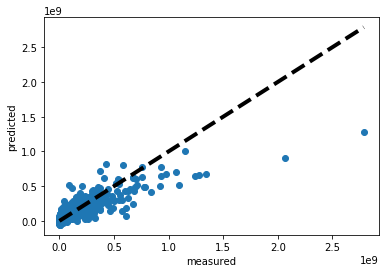

In [31]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [32]:
lm.score(X_test,y_test)

0.7137238861369728

In [33]:
lm.coef_

array([ 1.65254938e+00,  8.35243882e+05,  2.20358093e+05,  1.04484778e+07,
        6.42721665e+04, -1.52835605e+07,  9.53759348e+04, -2.59790785e+05,
        2.41793826e+00, -7.18363455e-08, -6.52949143e+03,  2.47124152e+04,
       -1.15951746e+04, -4.58868788e+05,  1.44944705e+07, -1.61824037e+07,
        5.12256772e+05,  4.40724968e+07, -2.15203737e+05, -1.84762948e+07,
        1.49899679e+07, -9.42254192e+06,  5.53948598e+07, -1.18695681e+07,
        8.76070211e+06, -1.52968950e+06, -8.58538796e+05, -2.29498694e+06,
       -2.02414665e+07, -1.39877091e+06, -3.54981148e+07,  4.66083779e+07,
       -1.69326142e+07, -2.88781585e+07, -2.10347792e+07])

In [34]:
lm.intercept_

8027197.98440212

In [35]:
#y_predicted,y_test

In [36]:
#y_test